# Kernel Tricks

Demonstrating SVM kernels on non-linear data.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)
np.random.seed(42)

---
## Compare Kernels

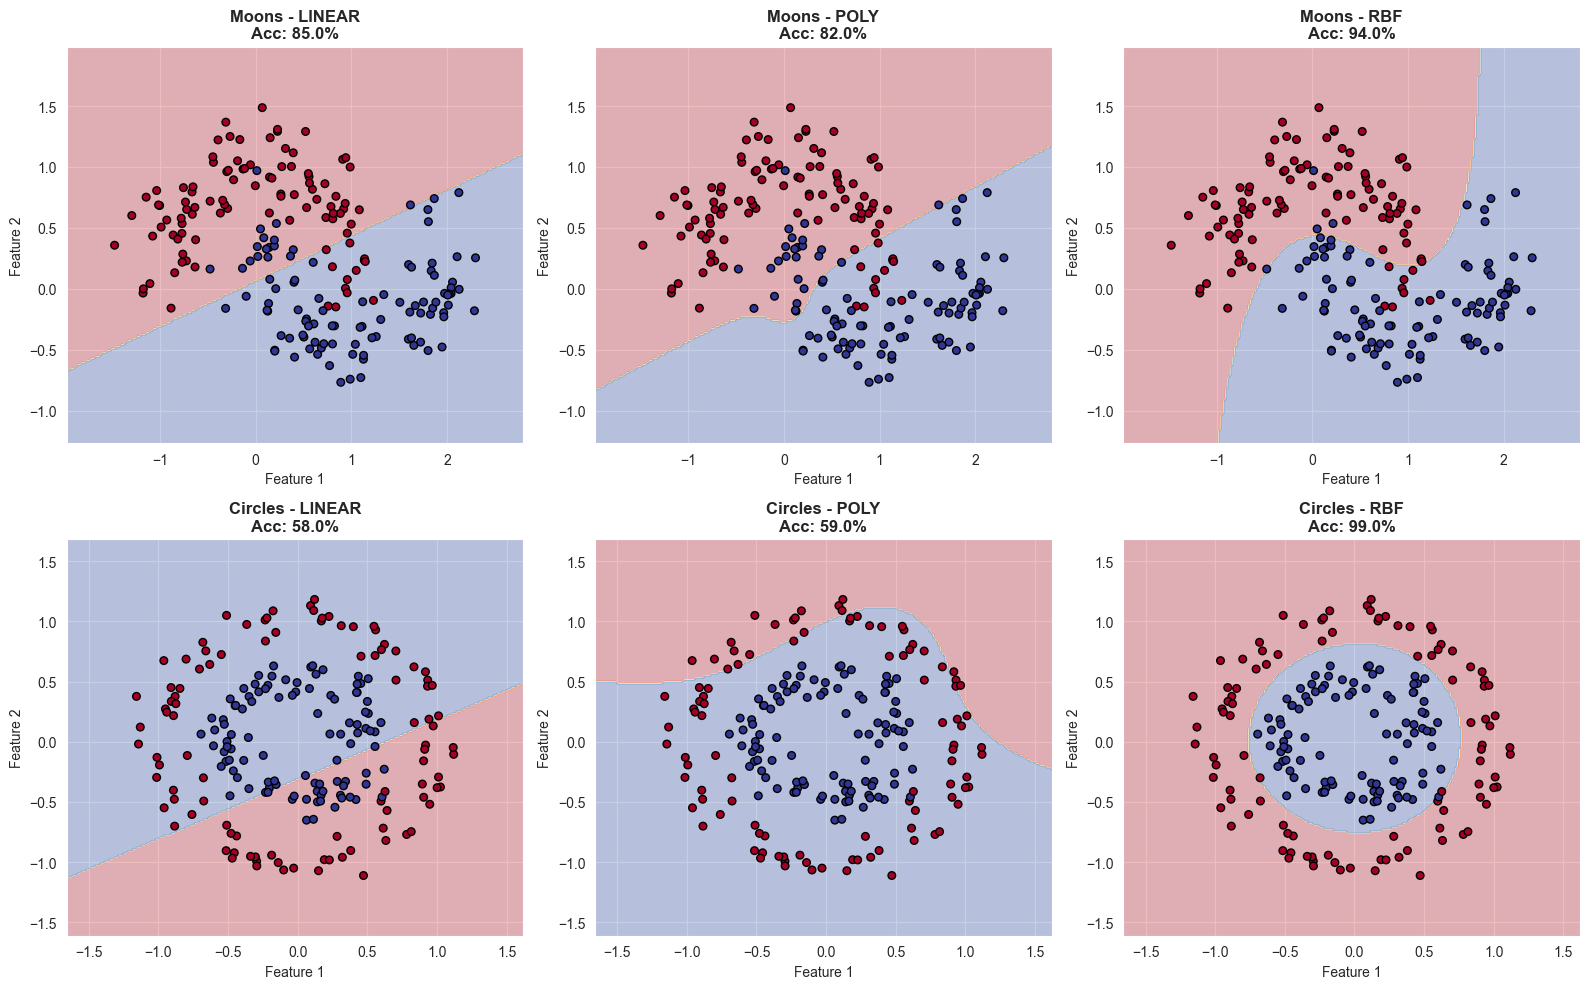

Linear: Fails on non-linear data
Polynomial: Works for specific patterns
RBF: Flexible, works well


In [2]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

datasets = [(X_moons, y_moons, 'Moons'), (X_circles, y_circles, 'Circles')]
kernels = ['linear', 'poly', 'rbf']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for row, (X, y, name) in enumerate(datasets):
    for col, kernel in enumerate(kernels):
        if kernel == 'poly':
            svm = SVC(kernel=kernel, degree=3, C=1, gamma='auto')
        else:
            svm = SVC(kernel=kernel, C=1, gamma='auto')
        
        svm.fit(X, y)
        
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        axes[row, col].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        axes[row, col].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=30)
        
        acc = svm.score(X, y)
        axes[row, col].set_title(f'{name} - {kernel.upper()}\nAcc: {acc*100:.1f}%',
                                fontweight='bold')
        axes[row, col].set_xlabel('Feature 1')
        axes[row, col].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print('Linear: Fails on non-linear data')
print('Polynomial: Works for specific patterns')
print('RBF: Flexible, works well')

---
## Effect of Gamma (RBF)

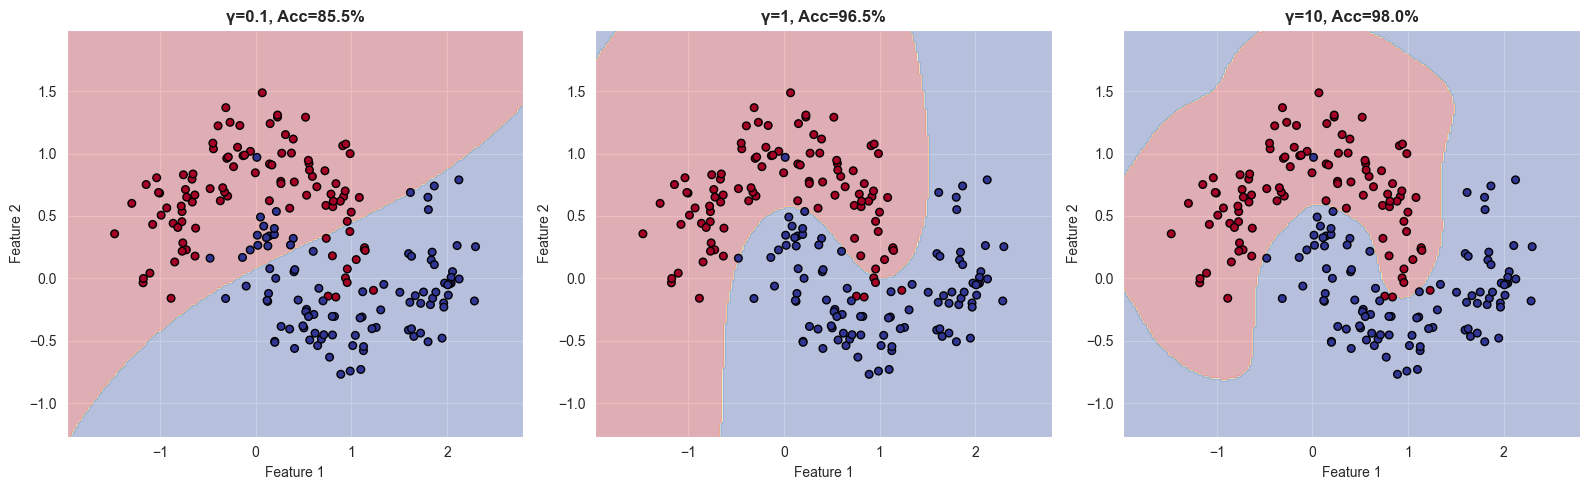

Low γ → smooth boundary
High γ → complex boundary (overfit risk)


In [3]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, gamma in enumerate([0.1, 1, 10]):
    svm = SVC(kernel='rbf', gamma=gamma, C=1)
    svm.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=30)
    
    acc = svm.score(X, y)
    axes[idx].set_title(f'γ={gamma}, Acc={acc*100:.1f}%', fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print('Low γ → smooth boundary')
print('High γ → complex boundary (overfit risk)')

---
## Summary

**Kernel Selection:**
- Linear: Fast, use when separable
- RBF: Good default for non-linear
- Polynomial: Specific relationships

**Hyperparameters:**
- C: Margin vs violations
- γ: Kernel width (complexity)

**Key Point:** "Kernels allow non-linear boundaries by mapping to higher dimensions. RBF is good default - tune C and γ via cross-validation."